In [34]:
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [35]:
titanic_df = pd.read_csv('./titanic_processed.csv')

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [36]:
titanic_df.shape

(712, 10)

In [37]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [39]:
y_pred = logistic_model.predict(x_test)

### Confusion matrix

In [40]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [41]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

titanic_crosstab

y_test,0,1
y_pred,,
0,74,18
1,14,37


In [42]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7762237762237763
precision_score :  0.7254901960784313
recall_score :  0.6727272727272727


In [43]:
def bar_chart(feature):
    survived = titanic_df[titanic_df['Survived']==1][feature].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

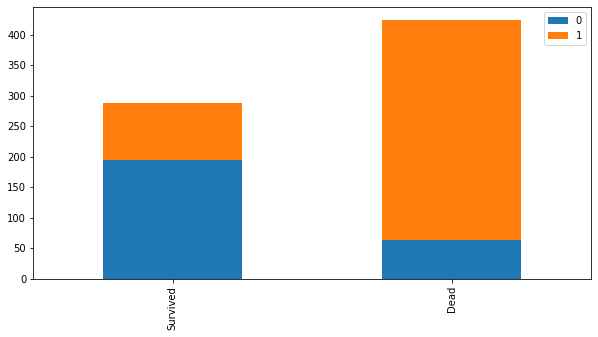

In [44]:
bar_chart('Sex')

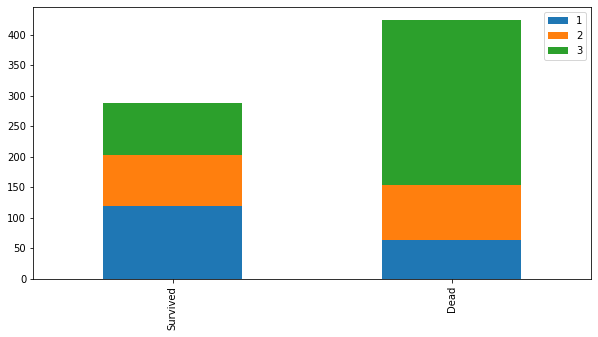

In [45]:
bar_chart('Pclass')